<h1><center><span style="color:#369;padding: 10px 30px 10px 30px;border: 3px solid #369;border-radius:7px;">parcours dans un arbre binaire </span></center></h1>

Un arbre binaire est un arbre de degré 2 (dont les noeuds sont de degré 2 au plus).
Vocabulaire :
Les enfants d’un noeud sont lus de gauche à droite et sont appelés: ﬁls gauche et ﬁls droit.

Étiquette :
Un arbre dont tous les noeuds sont nommés est dit étiqueté.L’étiquette (ou nom du sommet) représente la "valeur" du noeud ou bien l’information associée au noeud.


Racine, noeud, branche, feuille :
Un arbre est un ensemble organisé de noeuds dans lequel chaque noeud a un
père, sauf un noeud que l’on appelle la racine.
Si le noeud n’a pas de ﬁls, on dit que c’est une feuille.
Les noeuds sont reliés par des branches.


 ##  <span style="color:#369"> I. Parcours d'un arbre:</span>
 


La plupart des algorithmes sur les arbres nécessitent de parcourir tous les nœuds. Plusieurs méthodes sont donc possible pour explorer chaque nœud qui sont ;



    le parcours en largeur ;

    la parcours en profondeur

        préfixe ;

        infixe ;

        suffixe (ou postfixe);



In [25]:
from graphviz import Digraph

class Noeud():
    """Représente un noeud dans un arbre binaire
    - Propriétés :
        * valeur : valeur du noeud
        * gauche : noeud gauche ou None
        * droit  : noeud droit ou None
    - Méthodes   :
        * est_feuille() 
        * __repr__() : affichage d'un noeud"""
        
    def __init__(self,valeur):
        """ Constructeur """
        self.valeur = valeur
        self.gauche = None
        self.droit = None
    
    def ajouter_gauche(self,valeur):
        """ ajoute un fils gauche """
        self.gauche=Noeud(valeur)
    
    def ajouter_droit(self,valeur):
        """ ajoute un fils droit """
        self.droit=Noeud(valeur)
    
    def __str__(self):
        """
        Méthode de représentation
        """
        return f"[{self.valeur}, {self.gauche}, {self.droit}]"
    
    def parcours_largeur(self):
        """ Méthode pour effectuer un parcours en largeur """
        result = []
        queue = deque([self])  # On commence avec la racine dans la file
        
        while queue:
            current = queue.popleft()  # On retire le premier élément de la file
            result.append(current.valeur)  # On ajoute la valeur du noeud courant à la liste de résultats
            
            # On ajoute les enfants gauche et droit dans la file si présents
            if current.gauche:
                queue.append(current.gauche)
            if current.droit:
                queue.append(current.droit)
        
        return result
    
    def tableau(self):
        """Renvoie un tableau qui représente le noeud"""
               
        if self.gauche is None:
            fils_gauche = []
        else:
            fils_gauche = self.gauche.tableau()
            
        if self.droit is None:
            fils_droite = []
        else:
            fils_droite = self.droit.tableau()
        
        return [self.valeur, fils_gauche, fils_droite]  

    def parcours_largeur(self):
        """ Parcours en largeur (BFS) sans deque """
        result = []
        queue = [self]   # file = liste

        while queue:
            current = queue.pop(0)   # on retire le premier élément
            result.append(current.valeur)

            if current.gauche:
                queue.append(current.gauche)
            if current.droit:
                queue.append(current.droit)

        return result

class Arbrebin:
    """Représente un objet arbre binaire   """
    
    def __init__(self, nd = None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        self.racine = nd
    
    def importe(self, tableau):
        """Importe un arbre depuis un tableau"""
        def importe_tableau(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            if len(tableau) == 1:
                return Noeud(tableau[0])

            # tableau a une longueur >= 2
            nd = Noeud(tableau[0])
            nd.gauche = importe_tableau(tableau[1])
            nd.droit  = importe_tableau(tableau[2]) if len(tableau) > 2 else None
            return nd
        
        self.racine = importe_tableau(tableau)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot


Prenons un arbre et regardons comment est-il possible d’afficher les valeurs de tous les nœuds. 




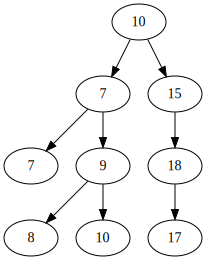

In [26]:
arbre = Noeud(10)
arbre.ajouter_gauche(7)
arbre.ajouter_droit(15)
arbre.droit.ajouter_droit(18)
arbre.gauche.ajouter_gauche(7)
arbre.gauche.ajouter_droit(9)
arbre.droit.droit.ajouter_gauche(17)
arbre.gauche.droit.ajouter_gauche(8)
arbre.gauche.droit.ajouter_droit(10)

tableau=arbre.tableau()

# On crée une instance vide de notre arbre
representationarbre = Arbrebin()
# On importe le tableau ci-dessus
representationarbre.importe(tableau)

# On visualise l'arbre graphiquement
representationarbre.show()

!!! info le parcours en largeur  

En effet, le sens de lecture est de gauche à droite et de haut en bas. 

!!!

In [27]:
arbre.parcours_largeur()

[10, 7, 15, 7, 9, 18, 8, 10, 17]

Le parcours en profondeur est un parcours récursif de l’arbre. Il existe trois possibilités de parcours récursif.


!!! info

<center><span style="color:red"> 
    Le parcours en profondeur préfixé traite d’abord la racine puis le sous-arbre gauche puis le sous-arbre droit
</span></center>

!!!

!!! question

Q10. Ecrire ci dessous le parcours prefixe de l'arbre 

!!!

!!! question 

Q11. ajouter la méthode prefixe qui renvoie le parcours prefixe de l'arbre

!!!

!!! info

<center><span style="color:red">
    Le parcours en profondeur infixé traite d’abord le sous-arbre gauche puis la racine puis le sous-arbre droit
</span></center>

!!!


!!! question



Q12. ajouter la méthode infixe qui renvoie le parcours infixe de l'arbre


!!!


!!! info 

<center><span style="color:red">
    Le parcours en profondeur suffixé traite d’abord le sous-arbre gauche puis le sous-arbre droit puis la racine
</span></center>

!!!

!!! question



Q13. ajouter la méthode suffixe qui renvoie le parcours suffixe de l'arbre


!!!

